Import the files we need

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Augumentation and Normalization
Load the Flowers test Data and Train Data

In [2]:
transform = transforms.Compose(
    [torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        )])

batch_size = 5
flower_path_train='flowers/Train'
flower_path_test='flowers/Test'
trainloader=DataLoader(
    torchvision.datasets.ImageFolder(flower_path_train,transform=transform),
    batch_size=batch_size, shuffle=True,num_workers=2
)

testloader=DataLoader(
    torchvision.datasets.ImageFolder(flower_path_test,transform=transform),
    batch_size=batch_size, shuffle=False,num_workers=2
)

len(trainloader),len(testloader)
classes = ('daisy', 'dandelion', 'rose', 'sunflower', 'tulip')

We shall count the flowers in Test and Train sets

In [3]:
#we have Five Class in the dataset, Let's see how many flowers in each Class
def flower_count(base_path):
    """
    basepath - flower Folder path
    return - dict {class_label :count(image)}

  """
    flower_classes = os.listdir(base_path)

    class_count = dict()
    for class_label in flower_classes:
    #Join the Current Flower path and counting length of class label
        class_count[class_label] = len(os.listdir(os.path.join(base_path , class_label)))
    return class_count 

flower_class_train_count = flower_count(flower_path_train) 
flower_class_test_count = flower_count(flower_path_test) 
flower_class_train_count,

({'daisy': 686,
  'dandelion': 968,
  'rose': 688,
  'sunflower': 577,
  'tulip': 888},)

Plot a bar graph to show Flowers count in each class in Train set

Text(0.5, 1.0, 'Train Flower Dataset')

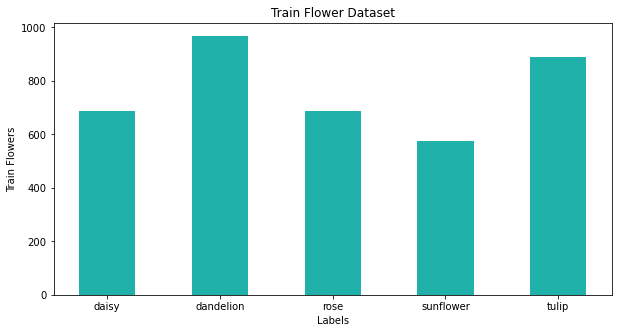

In [4]:
flower_class = list(flower_class_train_count.keys())
values = list(flower_class_train_count.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(flower_class, values, color ='lightseagreen',
        width = 0.5)
plt.xlabel("Labels")
plt.ylabel("Train Flowers")
plt.title("Train Flower Dataset")

In [5]:
flower_class_test_count

{'daisy': 78, 'dandelion': 84, 'rose': 96, 'sunflower': 156, 'tulip': 96}

Plot a bar graph to show Flowers count in each class in Train set

Text(0.5, 1.0, 'Test Flower Dataset')

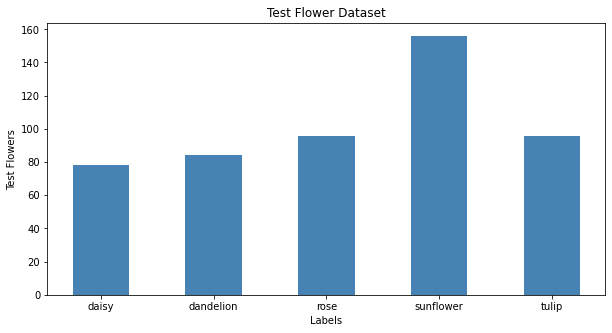

In [6]:
flower_class_test = list(flower_class_test_count.keys())
values = list(flower_class_test_count.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(flower_class_test, values, color ='steelblue',
        width = 0.5)
plt.xlabel("Labels")
plt.ylabel("Test Flowers")
plt.title("Test Flower Dataset")

Showing training images

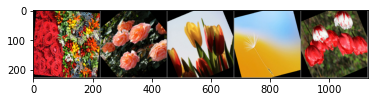

rose  rose  tulip dandelion rose 


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Training the Image Classification using Convolutional Neural Network

In [8]:
import torch.nn as nn
import torch.nn.functional as F
 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(256*28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 5))
        
    def forward(self, xb):
        return self.network(xb)
    

net = Net()

Define a Loss function and optimizer

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Training the Network

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 1000:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


Test the network on the test data

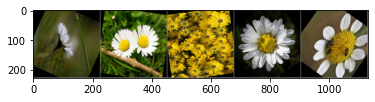

GroundTruth:  daisy daisy daisy daisy


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [12]:
net = Net()

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  sunflower sunflower sunflower sunflower


Showing how the network performs on the whole dataset

In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 30 %


Showing Accuracy for each class

In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

class_accuracy_list = []
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    temp = (classname, accuracy)
    class_accuracy_list.append(temp)

dfObj = pd.DataFrame(class_accuracy_list)
dfObj.columns = ['classes', 'accuracy']

#Bar plot with accuracy of respective classes
plt.figure(figsize=(13,12))
sns.set(style="whitegrid")
sns.barplot(x="classes", y="accuracy", data = dfObj, palette = "magma")
plt.xlabel('Classes',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.title('Accuracy for each class', fontsize=15)
plt.show()

Accuracy for class: daisy is 0.0 %
Accuracy for class: dandelion is 0.0 %
Accuracy for class: rose  is 0.0 %
Accuracy for class: sunflower is 100.0 %
Accuracy for class: tulip is 0.0 %
